In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

In [ ]:
import math
# 定義
def ret_a(lambda_rate, mu_rate):
  return lambda_rate / (mu_rate)

def average_queue_length(lambda_rate, mu_rate, s):
    rho = lambda_rate / (s * mu_rate)
    if rho >= 1:
        return np.nan  # サーバーが過負荷の場合、計算ができない
    # P_s = ( (lambda_rate / mu_rate)**s / np.math.factorial(s) ) / ( sum([(lambda_rate / mu_rate)**k / np.math.factorial(k) for k in range(s)]) + ( (lambda_rate / mu_rate)**s / (np.math.factorial(s) * (1 - rho)) ) )
    As, B = ret_As(lambda_rate, mu_rate, s)
    P0 = P_0(lambda_rate, mu_rate, s, rho)
    # P_s = ( (rho * s)**s / ( math.factorial(s) * (1 - rho)) ) * P0
    P_s = As * P0
    # P_s = ret_Ps(lambda_rate, mu_rate, s)
    L_q = P_s * rho / (1 - rho)
    return L_q

def average_waiting_time(L_q, lambda_rate):
    return L_q / lambda_rate

def ret_Ps(lambda_rate, mu_rate, s):
    rho = lambda_rate / (s * mu_rate)
    As, B = ret_As(lambda_rate, mu_rate, s)
    P0 = P_0(lambda_rate, mu_rate, s, rho)
    # P_s = ( (rho * s)**s / ( math.factorial(s) * (1 - rho)) ) * P0
    P_s = As * P0
    # P0 = P_0(lambda_rate, mu_rate, s, rho)
    # P_s = ( (rho * s)**s / ( math.factorial(s) * (1 - rho)) ) * P0
    return P_s

def probability_all_servers_occupied(lambda_rate, mu_rate, s):
    rho = lambda_rate / (s * mu_rate)
    if rho >= 1:
        return np.nan  # サーバーが過負荷の場合、計算ができない

    As, B = ret_As(lambda_rate, mu_rate, s)
    P0 = P_0(lambda_rate, mu_rate, s, rho)
    # P_s = ( (rho * s)**s / ( math.factorial(s) * (1 - rho)) ) * P0
    P_s = As * P0
    # P_s = ((lambda_rate / mu_rate)**s / math.factorial(s)) * P0 / (1 - rho)
    # P_s = ( (lambda_rate / mu_rate)**s / np.math.factorial(s) ) / ( sum([(lambda_rate / mu_rate)**k / np.math.factorial(k) for k in range(s)]) + ( (lambda_rate / mu_rate)**s / (np.math.factorial(s) * (1 - rho)) ) )
    return P_s

def ret_As(lambda_, mu, c):
  #    for (var n=1; n<=s; n++) {
  #      As = As * (s*ρ/n);
  #      B = B + As;
  #  }
  rho = lambda_ / (c * mu)
  As = 1
  B = 1
  for n in range(1, c+1):
    As = As * (c * rho / n)
    B = B + As

  # print(["As", As])
  # print(["B", B])
  return As, B

def P_0(lambda_, mu, c, rho):
    As, B = ret_As(lambda_, mu, c)
    P0 = 1 / (B + As * rho / (1 - rho))
    # sum_terms = sum((lambda_ / mu)**n / math.factorial(n) for n in range(c))
    # P0 = 1 / (sum_terms + ((lambda_ / mu)**c / math.factorial(c)) * (1 / (1 - rho)))
    return P0

def mmc_model(lambda_, mu, c):
    # 利用率 ρ

    rho = lambda_ / (c * mu)
    print([lambda_, mu, c, lambda_/(c*mu), rho])
    # 状態確率 P(0) の計算
    # var P0 = 1/(B + As*ρ/(1-ρ));

    #  var Ps = As * P0;
    #  var Pq = Ps/(1-ρ);
    #  var Lq = ρ/((1-ρ)*(1-ρ)) * As * P0;
    #  var L  = Lq + s*ρ;

    # P(0) の計算
    P0 = P_0(lambda_, mu, c, rho)

    As, B = ret_As(lambda_, mu, c)
    Ps = As * P0
    Pq = Ps/(1-rho)

    # P(c) の計算（1 - ρ の項を追加）
    Pc = Pq

    # 平均待ち行列長 Lq の計算
    Lq = rho / ((1 - rho) * (1 - rho)) * As * P0

    L = Lq + c * rho
    # 平均待ち時間 Wq の計算
    Wq = Lq / lambda_

    return {
        'rho': rho,
        'P0': P0,
        'Pc': Pc,
        'Ps': Ps,
        'Pq' :Pq,
        'Lq': Lq,
        'L': L,
        'Wq': Wq
    }

# パラメータ
lambda_ = 249  # 到着率
mu = 0.5     # サービス率
c = 500

result = mmc_model(lambda_, mu, c)
print(f"利用率 ρ: {result['rho']}")
print(f"状態確率 P(0): {result['P0']}")
print(f"状態確率 Pc: {result['Pc']}")
print(f"状態確率 Pq: {result['Pq']}")
print(f"状態確率 Ps: {result['Ps']}")
print(f"平均待ち行列長 Lq: {result['Lq']}")
print(f"平均待ち行列長 L: {result['L']}")
print(f"平均待ち時間 Wq: {result['Wq']}")

[249, 0.5, 500, 0.996, 0.996]
利用率 ρ: 0.996
状態確率 P(0): 1.0589200950265332e-217
状態確率 Pc: 0.8934413394040313
状態確率 Pq: 0.8934413394040313
状態確率 Ps: 0.003573765357616128
平均待ち行列長 Lq: 222.46689351160356
平均待ち行列長 L: 720.4668935116035
平均待ち時間 Wq: 0.8934413394040304


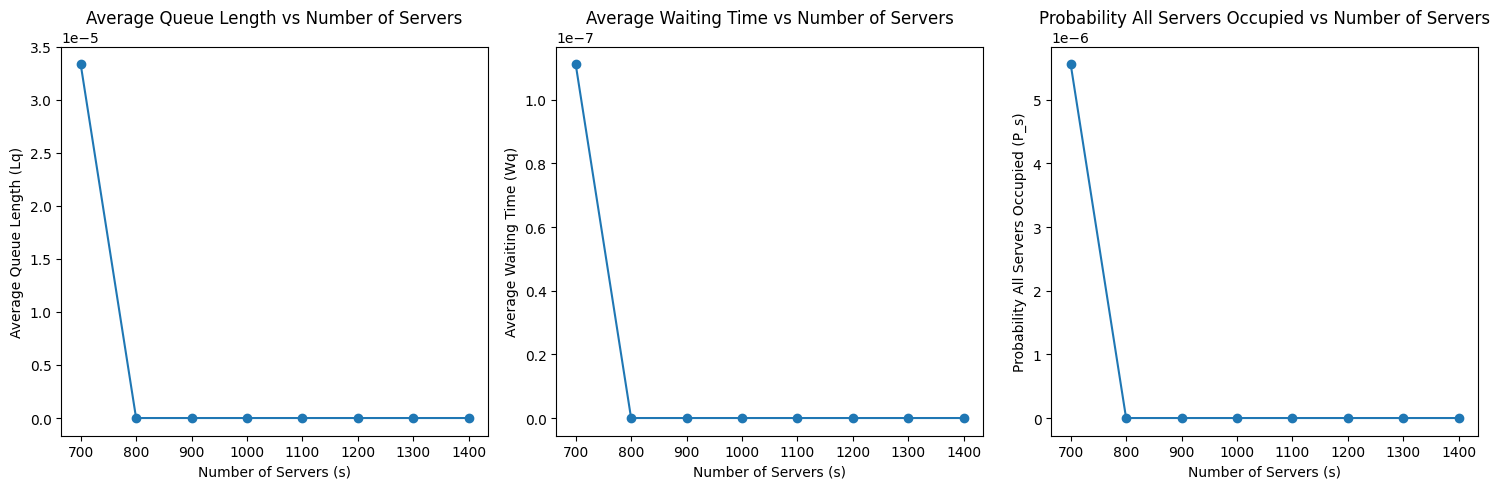

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
# サーバー数の範囲
import numpy as np
s_values = np.arange(100, 1500, 100)

# 結果を保存するリスト
L_q_values = []
W_q_values = []
P_s_values = []
lambda_rate = 300  # 到着率
mu_rate = 0.5

for s in s_values:
    L_q = average_queue_length(lambda_rate, mu_rate, s)
    W_q = average_waiting_time(L_q, lambda_rate) if L_q is not np.nan else np.nan
    P_s = probability_all_servers_occupied(lambda_rate, mu_rate, s)

    L_q_values.append(L_q)
    W_q_values.append(W_q)
    P_s_values.append(P_s)

# グラフ描画
plt.figure(figsize=(15, 5))

# 平均待ち行列長
plt.subplot(1, 3, 1)
plt.plot(s_values, L_q_values, marker='o')
plt.xlabel('Number of Servers (s)')
plt.ylabel('Average Queue Length (Lq)')
plt.title('Average Queue Length vs Number of Servers')

# 平均待ち時間
plt.subplot(1, 3, 2)
plt.plot(s_values, W_q_values, marker='o')
plt.xlabel('Number of Servers (s)')
plt.ylabel('Average Waiting Time (Wq)')
plt.title('Average Waiting Time vs Number of Servers')

# 全サーバーがふさがっている確率
plt.subplot(1, 3, 3)
plt.plot(s_values, P_s_values, marker='o')
plt.xlabel('Number of Servers (s)')
plt.ylabel('Probability All Servers Occupied (P_s)')
plt.title('Probability All Servers Occupied vs Number of Servers')

plt.tight_layout()
plt.show()
